In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET - Bonheur </h1>
</div>

In [65]:
# data = pd.read_excel("Rapport-bonheur2022.xls")
data = pd.read_csv("csv/rapportbonheur2019avecregion.csv")

In [66]:
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,South Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Sub-Saharan Africa


In [67]:
data = data.rename(columns={"Happiness score" : "Score"})
data = data.rename(columns={"Country" : "Country or region"})
data = data.dropna()

In [68]:
data.shape

(147, 10)

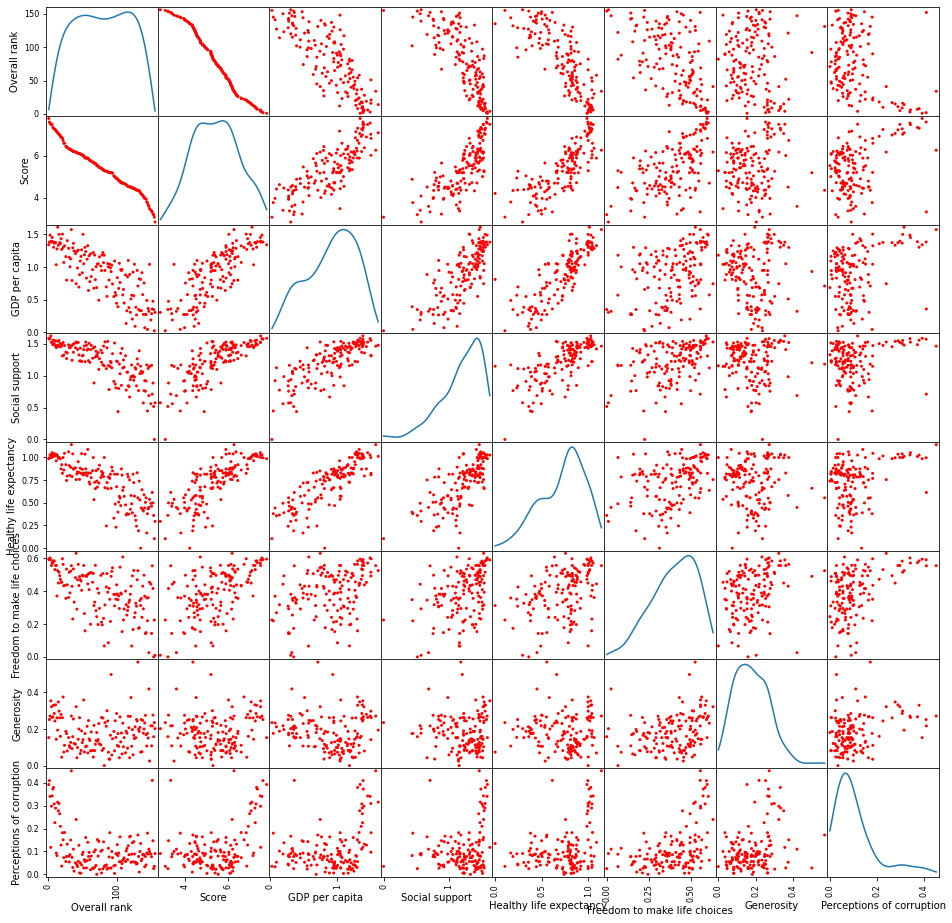

In [69]:
scatter_matrix(data.iloc[:,:], alpha = 1, figsize = (16, 16), diagonal = 'kde',color="red")
plt.show()

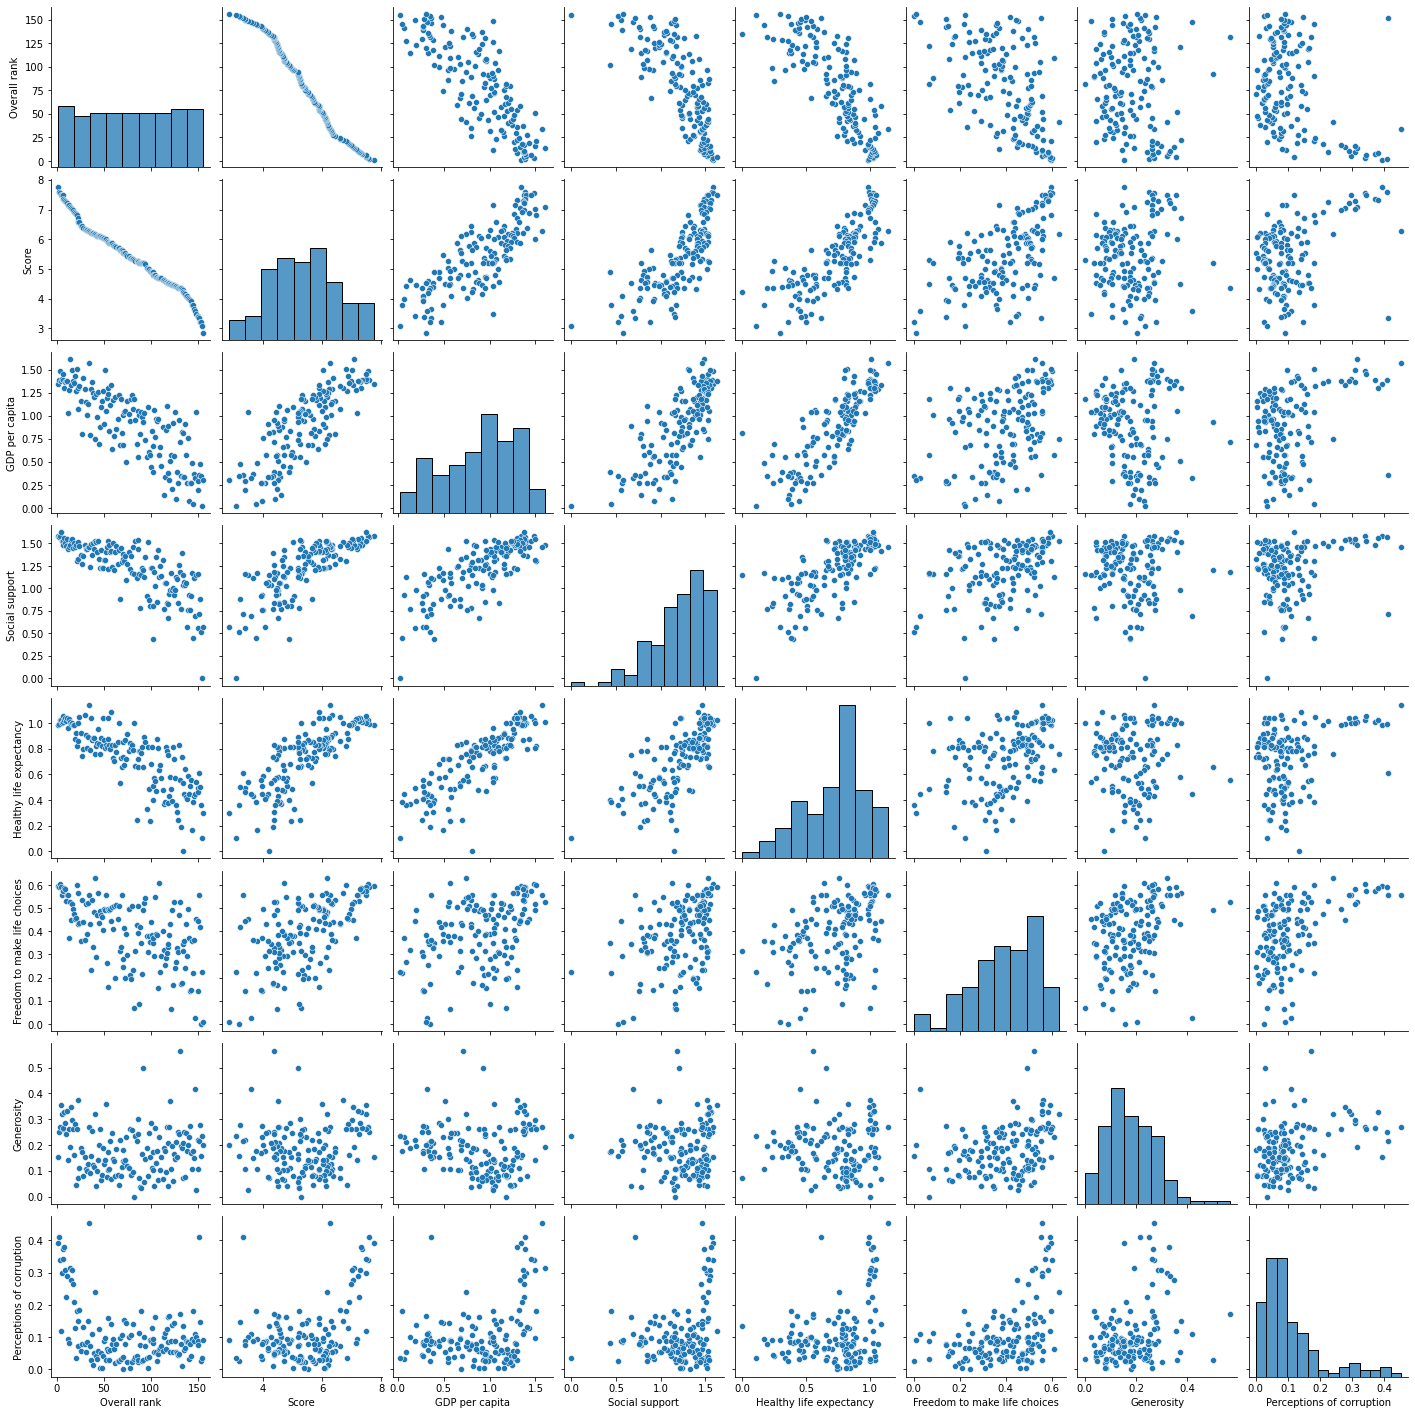

In [70]:
sns.pairplot(data)

<AxesSubplot:>

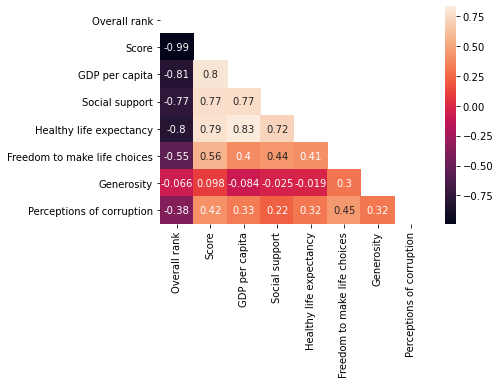

In [71]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask= matrix)

# Score

<AxesSubplot:xlabel='Score', ylabel='Country or region'>

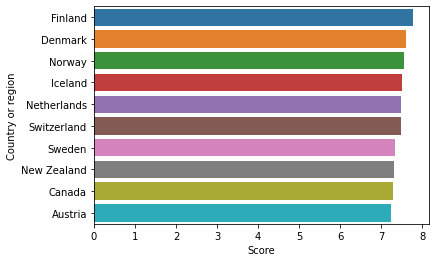

In [152]:
data1=data.sort_values(ascending = False, by=['Score'])
sns.barplot(x=data['Score'].head(10), y =data['Country or region'].head(10))

# Social support

<AxesSubplot:xlabel='Social support', ylabel='Country or region'>

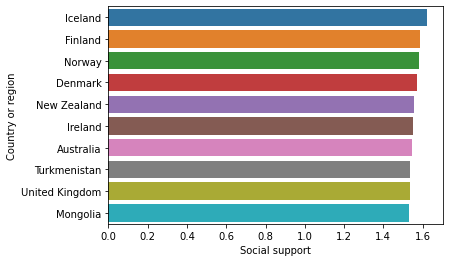

In [146]:
data1=data.sort_values(ascending = False, by=['Social support'])
sns.barplot(x=data1['Social support'].head(10), y =data1['Country or region'].head(10))

# Healthy life expectancy

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Country or region'>

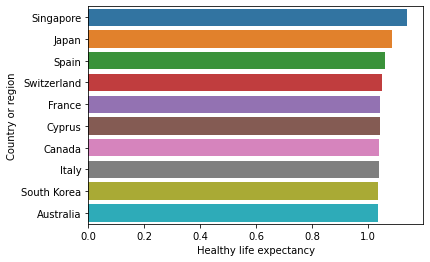

In [147]:
data1=data.sort_values(ascending = False, by=['Healthy life expectancy'])
sns.barplot(x=data1['Healthy life expectancy'].head(10), y =data1['Country or region'].head(10))

# GDP per capita

<AxesSubplot:xlabel='GDP per capita', ylabel='Country or region'>

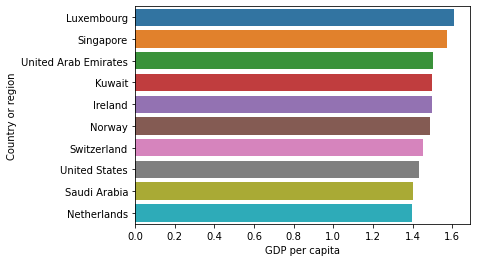

In [148]:
data1=data.sort_values(ascending = False, by=['GDP per capita'])
sns.barplot(x=data1['GDP per capita'].head(10), y =data1['Country or region'].head(10))

# Freedom to make life choices

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country or region'>

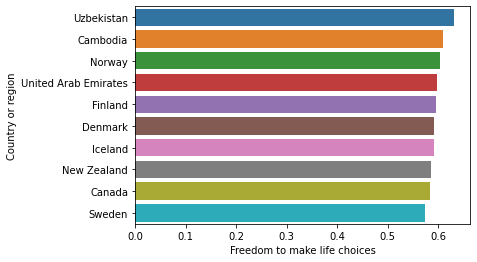

In [150]:
data1=data.sort_values(ascending = False, by=['Freedom to make life choices'])
sns.barplot(x=data1['Freedom to make life choices'].head(10), y =data1['Country or region'].head(10))

# Generosity

<AxesSubplot:xlabel='Generosity', ylabel='Country or region'>

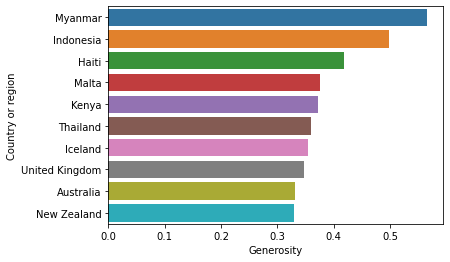

In [151]:
data1=data.sort_values(ascending = False, by=['Generosity'])
sns.barplot(x=data1['Generosity'].head(10), y =data1['Country or region'].head(10))

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Elbow Method</h1>
</div>

# data

In [76]:
data1 = data.copy()
X = data1.drop(columns=['Country or region','Score','Region'])
region = data1['Country or region']

In [77]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [78]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 39.451328251111136
2 : 19.481360642510552
3 : 13.18092188660756
4 : 9.671529601221334
5 : 7.756880531319166
6 : 6.495573658296563
7 : 5.557895300338023
8 : 4.890745573644577
9 : 4.379737512161497


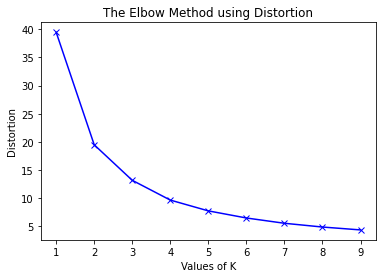

In [79]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [80]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 302912.2711132109
2 : 74173.99064716586
3 : 33810.78465075532
4 : 18402.561206861355
5 : 11770.536288894655
6 : 8289.757266088971
7 : 6065.271825024109
8 : 4643.005296436724
9 : 3719.86275305637


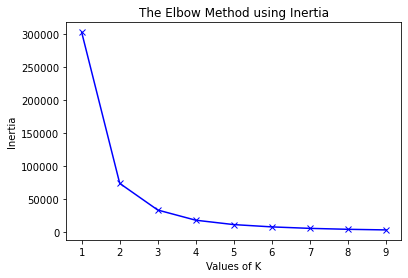

In [81]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">KMEANS</h1>
</div>

In [82]:
# 3 et 2

In [116]:
kmeanModel = KMeans(n_clusters=2).fit(X)
kmeanModel.fit(X)
y = kmeanModel.predict(X)


In [117]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">TSNE</h1>
</div>

In [119]:
from sklearn.manifold import TSNE

model = TSNE(n_components=3, random_state=0)
tab = model.fit_transform(X)


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [120]:
bonheur = {}
bonheur['axe1'] = tab[:,0]
bonheur['axe2'] = tab[:,1]
bonheur['axe3'] = tab[:,2]
bonheur['label'] = y
bonheur['region'] = region

df2 = pd.DataFrame(bonheur)



In [121]:
df2

,axe1,axe2,axe3,label,region
0,177.669861,21.003016,49.609379,1,Finland
1,141.893356,7.678092,-13.668516,1,Denmark
2,170.949966,99.570198,42.812397,1,Norway
3,156.290649,79.026154,-5.301325,1,Iceland
4,126.387497,49.168076,-3.976868,1,Netherlands
...,...,...,...,...,...
151,-23.028563,-45.159569,-146.222672,0,Rwanda
152,-101.966934,-116.418030,-113.186829,0,Tanzania
153,-61.187881,-17.946045,-144.089249,0,Afghanistan
154,-72.579842,-114.895889,-148.213882,0,Central African Republic


<AxesSubplot:xlabel='axe1', ylabel='axe2'>

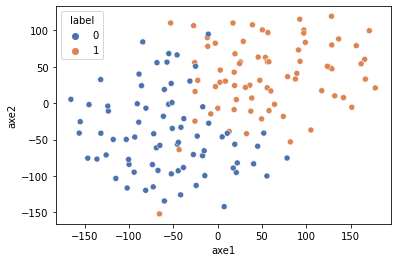

In [122]:
sns.scatterplot(data=df2, x="axe1", y="axe2",hue="label" , palette="deep")


In [123]:
import plotly.express as px

fig = px.scatter_3d(df2, x='axe1', y='axe2', z='axe3',
              color='label',text="region" )
fig.show()

In [124]:
df2

,axe1,axe2,axe3,label,region
0,177.669861,21.003016,49.609379,1,Finland
1,141.893356,7.678092,-13.668516,1,Denmark
2,170.949966,99.570198,42.812397,1,Norway
3,156.290649,79.026154,-5.301325,1,Iceland
4,126.387497,49.168076,-3.976868,1,Netherlands
...,...,...,...,...,...
151,-23.028563,-45.159569,-146.222672,0,Rwanda
152,-101.966934,-116.418030,-113.186829,0,Tanzania
153,-61.187881,-17.946045,-144.089249,0,Afghanistan
154,-72.579842,-114.895889,-148.213882,0,Central African Republic


# je recupere les codes à 3 lettres des pays

In [125]:
pays = pd.read_csv("csv/sql-pays.csv")

In [126]:


pays["nom_en_gb"] = pays["nom_en_gb"].astype('string')
pays["alpha3"] = pays["alpha3"].astype('string')

pays['alpha3']

1      AFG
2      ALB
3      ATA
4      DZA
5      ASM
      ... 
237    WLF
238    WSM
239    YEM
240    SCG
241    ZMB
Name: alpha3, Length: 241, dtype: string

In [127]:

# df2['code'] = df2['region'].apply(lambda x:  pays[pays['nom_en_gb'] == x]['alpha3'], axis=0)

tab_pays = []

for index, row in df2.iterrows():
    
    bol = True
    
    for index, row1 in pays.iterrows():
        
        if row1['nom_en_gb'] == row['region'] :
            
            tab_pays.append(row1['alpha3'])
            bol = False
            
    if bol:
        
        tab_pays.append(None)

In [128]:
len(tab_pays)

147

In [129]:
df2['code'] = " "
df2['code'] = tab_pays

In [130]:
df2[df2['code'].isnull()]

,axe1,axe2,axe3,label,region,code
45,49.552189,-21.512218,97.712036,1,Kosovo,None
53,36.335323,24.774551,49.373661,1,South Korea,None
67,-2.682316,82.410210,-21.906004,1,Russia,None
69,64.078926,-1.477287,-61.009438,1,Serbia,None
70,73.960014,-18.160063,-21.433289,1,Moldova,None
71,47.524845,31.456310,-96.985558,1,Libya,None
72,-27.055679,106.490524,10.648519,1,Montenegro,None
98,-41.365051,-33.075073,-38.312950,0,Ivory Coast,None
102,-14.415617,-99.447472,-4.155521,0,Congo (Brazzaville),None
104,19.333397,-56.406086,-13.666319,0,Laos,None


In [131]:
df2['code'][df2['region'] == "Kosovo"] = "CS-KM"
df2['code'][df2['region'] == "South Korea"] = "KOR"
df2['code'][df2['region'] == "South Korea"] = "KOR"
df2['code'][df2['region'] == "Russia"] = "RUS"
df2['code'][df2['region'] == "Serbia"] = "SRB"
df2['code'][df2['region'] == "Moldova"] = "MDA"
df2['code'][df2['region'] == "Libya"] = "LBY"
df2['code'][df2['region'] == "Montenegro"] = "MNE"
df2['code'][df2['region'] == "Ivory Coast"] = "CIV"
df2['code'][df2['region'] == "Congo (Brazzaville)"] = "COG"
df2['code'][df2['region'] == "Laos"] = "LAO"
df2['code'][df2['region'] == "Palestinian Territories"] = "PSE"
df2['code'][df2['region'] == "Iran"] = "IRN"
df2['code'][df2['region'] == "Congo (Kinshasa)"] = "COD"
df2['code'][df2['region'] == "Tanzania"] = "TZA"
df2['code'][df2['region'] == "Central African Republic"] = "CAF"
df2['code'][df2['region'] == "South Sudan"] = "SSD"



<ipython-input-131-e881fa026968>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-e881fa026968>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-e881fa026968>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-e881fa026968>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [132]:
df2[df2['code'].isnull()]

,axe1,axe2,axe3,label,region,code


In [133]:
df2

,axe1,axe2,axe3,label,region,code
0,177.669861,21.003016,49.609379,1,Finland,FIN
1,141.893356,7.678092,-13.668516,1,Denmark,DNK
2,170.949966,99.570198,42.812397,1,Norway,NOR
3,156.290649,79.026154,-5.301325,1,Iceland,ISL
4,126.387497,49.168076,-3.976868,1,Netherlands,NLD
...,...,...,...,...,...,...
151,-23.028563,-45.159569,-146.222672,0,Rwanda,RWA
152,-101.966934,-116.418030,-113.186829,0,Tanzania,TZA
153,-61.187881,-17.946045,-144.089249,0,Afghanistan,AFG
154,-72.579842,-114.895889,-148.213882,0,Central African Republic,CAF


In [145]:
df2[df2['region'].str.contains('Guyane')]

,axe1,axe2,axe3,label,region,code


In [134]:
df3 = df2.copy()

In [135]:
df3 = df3.drop(columns=['axe1','axe2','axe3','region'])


In [136]:
df3 = df3[['code','label']]
df3

,code,label
0,FIN,1
1,DNK,1
2,NOR,1
3,ISL,1
4,NLD,1
...,...,...
151,RWA,0
152,TZA,0
153,AFG,0
154,CAF,0


In [137]:
df3.to_csv('csv/classement_bonheur1.csv',index = False)

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Carte</h1>
</div>

In [138]:
import json

with open('json/country.json') as mon_fichier:
    country = json.load(mon_fichier)



In [161]:
import pandas as pd
import folium




state_geo = country
state_data = pd.read_csv("csv/classement_bonheur1.csv")

# # print(state_geo)

m = folium.Map()

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["code", "label"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="label Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m


In [162]:
m.save("carte_du_bonheur.html")